# **📊 PROJECT 1: General EDA — Global Superstore Dataset**

In [1]:
# Install required libraries
!pip install seaborn

# Import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

1️⃣ Upload and Load the Dataset

In [2]:
import pandas as pd

# Upload the csv file
from google.colab import files
uploaded = files.upload()

# Load the csv file
df = pd.read_csv("Global_Superstore2.csv", encoding='latin-1')

# Preview the data
display(df.head(10))

Saving Global_Superstore2.csv to Global_Superstore2.csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,14-04-2012,18-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,14-10-2014,21-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,28-01-2012,31-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


2️⃣ Clean the Data

In [3]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
print(df.isnull().sum())

# Fill or drop missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # or df.dropna()

# Detect and handle outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

for col in ['Sales', 'Profit']:
    df = remove_outliers_iqr(df, col)

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [4]:
df.drop_duplicates(inplace=True)

In [7]:
for col in ['Sales', 'Profit']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

3️⃣ Statistical Analysis

In [6]:
import pandas as pd

# Assuming df is your cleaned DataFrame

# Mean
mean = df.mean(numeric_only=True)
print("Mean:\n", mean)

# Median
median = df.median(numeric_only=True)
print("\nMedian:\n", median)

# Standard Deviation
std_dev = df.std(numeric_only=True)
print("\nStandard Deviation:\n", std_dev)

# Variance
variance = df.var(numeric_only=True)
print("\nVariance:\n", variance)

Mean:
 Row ID           26128.704257
Postal Code      55258.241612
Sales               59.329160
Quantity             2.959353
Discount             0.126369
Profit               8.366079
Shipping Cost        6.490560
dtype: float64

Median:
 Row ID           26888.000000
Postal Code      55190.379428
Sales               42.400000
Quantity             2.000000
Discount             0.000000
Profit               6.255000
Shipping Cost        3.750000
dtype: float64

Standard Deviation:
 Row ID           15091.029331
Postal Code      14974.287588
Sales               53.226194
Quantity             1.931421
Discount             0.201437
Profit              13.626971
Shipping Cost        8.050732
dtype: float64

Variance:
 Row ID           2.277392e+08
Postal Code      2.242293e+08
Sales            2.833028e+03
Quantity         3.730387e+00
Discount         4.057701e-02
Profit           1.856943e+02
Shipping Cost    6.481428e+01
dtype: float64


In [8]:
print(df.describe())
print(df.corr(numeric_only=True))

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  28716.000000  28716.000000  28716.000000  28716.000000  28716.000000   
mean   26316.064111  55210.373171     49.601008      2.879161      0.124766   
std    15141.756181  15123.475838     40.428292      1.880393      0.200901   
min        1.000000   1453.000000      0.444000      1.000000      0.000000   
25%    12670.500000  55190.379428     17.982000      2.000000      0.000000   
50%    27337.000000  55190.379428     37.860000      2.000000      0.000000   
75%    39525.500000  55190.379428     69.840000      4.000000      0.200000   
max    51290.000000  99301.000000    180.600000     14.000000      0.800000   

             Profit  Shipping Cost  
count  28716.000000   28716.000000  
mean       7.382790       5.422957  
std       11.402201       6.217929  
min      -20.580000       0.000000  
25%        0.960000       1.460000  
50%        5.820000       3.350000  
75%       13.950000       6.9

In [9]:
# Correlation matrix
correlations = df.corr(numeric_only=True)
print("\nCorrelation matrix:\n", correlations)


Correlation matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000     0.002534 -0.144489 -0.196825  0.057179 -0.033448   
Postal Code    0.002534     1.000000  0.007502  0.010803  0.018046 -0.011218   
Sales         -0.144489     0.007502  1.000000  0.266258 -0.246886  0.458194   
Quantity      -0.196825     0.010803  0.266258  1.000000 -0.019800  0.166251   
Discount       0.057179     0.018046 -0.246886 -0.019800  1.000000 -0.589744   
Profit        -0.033448    -0.011218  0.458194  0.166251 -0.589744  1.000000   
Shipping Cost -0.096922    -0.000343  0.700139  0.186475 -0.178131  0.324289   

               Shipping Cost  
Row ID             -0.096922  
Postal Code        -0.000343  
Sales               0.700139  
Quantity            0.186475  
Discount           -0.178131  
Profit              0.324289  
Shipping Cost       1.000000  


In [10]:
summary = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Std Dev': df.std(numeric_only=True),
    'Variance': df.var(numeric_only=True)
})
print(summary)

                       Mean       Std Dev      Variance
Row ID         26316.064111  15141.756181  2.292728e+08
Postal Code    55210.373171  15123.475838  2.287195e+08
Sales             49.601008     40.428292  1.634447e+03
Quantity           2.879161      1.880393  3.535876e+00
Discount           0.124766      0.200901  4.036134e-02
Profit             7.382790     11.402201  1.300102e+02
Shipping Cost      5.422957      6.217929  3.866264e+01


In [11]:
print(df.describe())
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
print(numeric_cols.corr())

             Row ID   Postal Code         Sales      Quantity      Discount  \
count  28716.000000  28716.000000  28716.000000  28716.000000  28716.000000   
mean   26316.064111  55210.373171     49.601008      2.879161      0.124766   
std    15141.756181  15123.475838     40.428292      1.880393      0.200901   
min        1.000000   1453.000000      0.444000      1.000000      0.000000   
25%    12670.500000  55190.379428     17.982000      2.000000      0.000000   
50%    27337.000000  55190.379428     37.860000      2.000000      0.000000   
75%    39525.500000  55190.379428     69.840000      4.000000      0.200000   
max    51290.000000  99301.000000    180.600000     14.000000      0.800000   

             Profit  Shipping Cost  
count  28716.000000   28716.000000  
mean       7.382790       5.422957  
std       11.402201       6.217929  
min      -20.580000       0.000000  
25%        0.960000       1.460000  
50%        5.820000       3.350000  
75%       13.950000       6.9

4️⃣ Visualizations

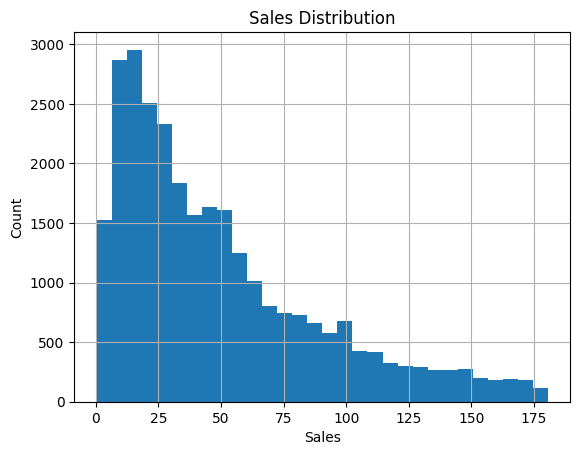

In [12]:
# Histogram
df['Sales'].hist(bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

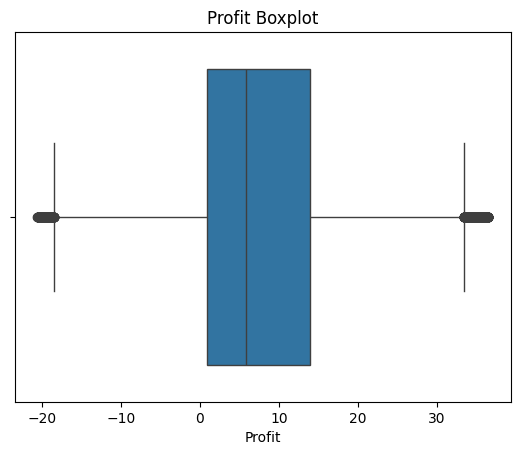

In [13]:
# Boxplot
sns.boxplot(x=df['Profit'])
plt.title("Profit Boxplot")
plt.show()

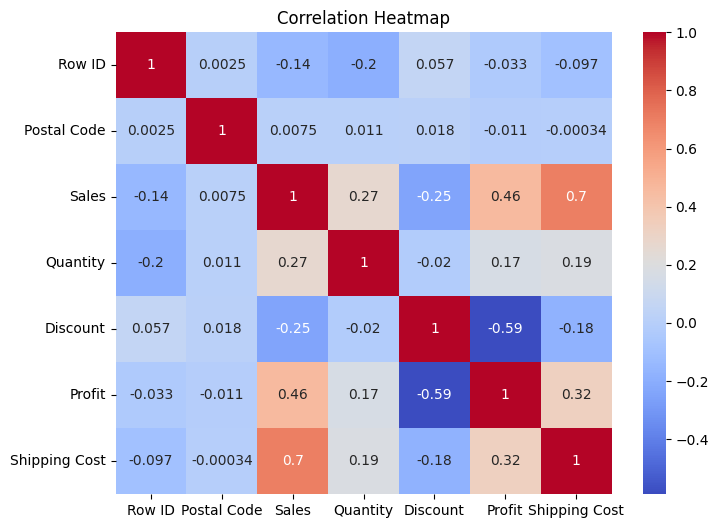

In [14]:
# Heatmap for Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

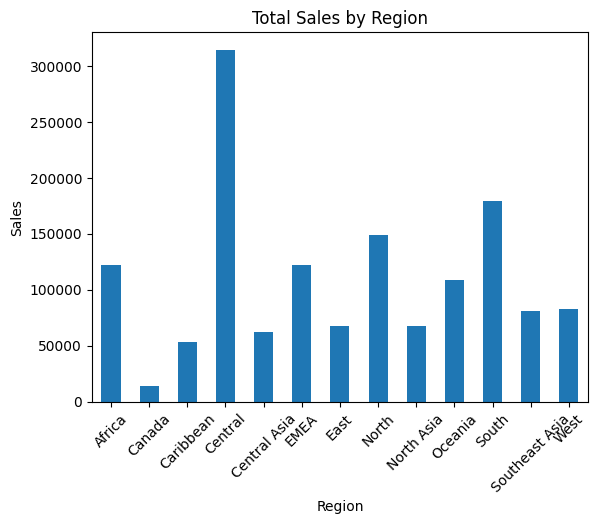

In [15]:
# Sales by Region
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

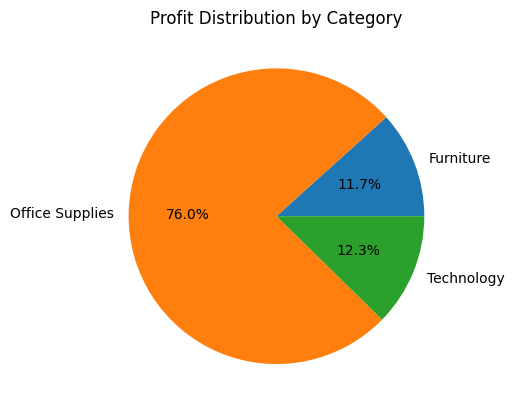

In [16]:
# Profit by Category
df.groupby('Category')['Profit'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Profit Distribution by Category")
plt.ylabel("")
plt.show()

# **📊 PROJECT 2: Sales Performance Analysis**

In [31]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1️⃣ Upload and Load the Dataset

In [24]:
# Load the file with 'latin1' encoding to avoid UnicodeDecodeError
file_path = '/content/Sales Data.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Preview the data
df.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


In [26]:
print("Shape of dataset:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))
print(df.columns.tolist())

Shape of dataset: (185950, 13)

Column Data Types:
 Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
Profit              float64
Category             object
dtype: object

Missing Values:
 Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Profit              0
Category            0
dtype: int64

Summary Statistics:
            Unnamed: 0       Order ID               Product  Quantity Ordered  \
count   185950.000000  185950.000000                185950     185950.000000   
unique            NaN            NaN                    19             

In [25]:
# Let's assume 20% of Sales is profit (as a placeholder)
df['Profit'] = df['Sales'] * 0.2

# Create a list of categories
categories = ['Electronics', 'Clothing', 'Accessories', 'Home', 'Office Supplies']

# Assign random categories
np.random.seed(42)  # For reproducibility
df['Category'] = np.random.choice(categories, size=len(df))

print()
df[['Product', 'Category']].head(10)

,Product,Category
0,Macbook Pro Laptop,Home
1,LG Washing Machine,Office Supplies
2,USB-C Charging Cable,Accessories
3,27in FHD Monitor,Office Supplies
4,USB-C Charging Cable,Office Supplies
5,AA Batteries (4-pack),Clothing
6,USB-C Charging Cable,Accessories
7,USB-C Charging Cable,Accessories
8,Bose SoundSport Headphones,Accessories
9,AAA Batteries (4-pack),Office Supplies


2️⃣ Data Cleaning

In [29]:
# Drop duplicates
df = df.drop_duplicates()

# Fill numeric columns with mean if missing
for col in ['Sales', 'Profit', 'Discount']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric
        df[col] = df[col].fillna(df[col].mean())  # safe assignment without inplace=True

# Convert 'Date' column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print("Data cleaned successfully.")
print(df.info())

Data cleaned successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
 11  Profit            185950 non-null  float64
 12  Category          185950 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 18.4+ MB
None


In [48]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop invalid dates
df = df.dropna(subset=['Order Date'])

# Group by Month-End (use 'ME' instead of 'M')
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()
df['Profit'] = df['Sales'] * 0.2
df['Discount'] = np.random.uniform(0, 0.3, size=len(df))

3️⃣  Visualizations

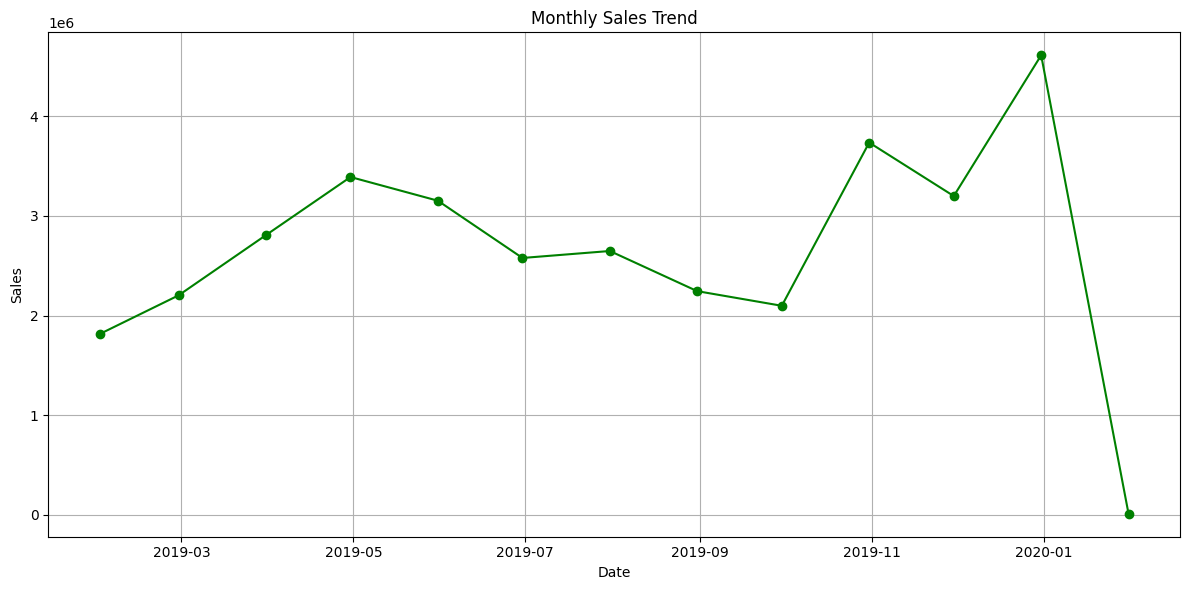

In [37]:
# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

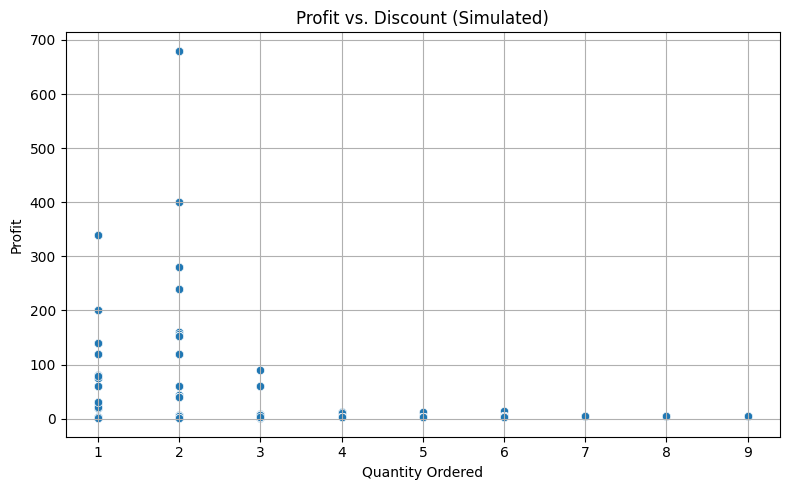

In [38]:
# Plot Profit vs Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount' if 'Discount' in df.columns else 'Quantity Ordered',
                y='Profit', data=df)
plt.title('Profit vs. Discount (Simulated)')
plt.xlabel('Discount' if 'Discount' in df.columns else 'Quantity Ordered')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

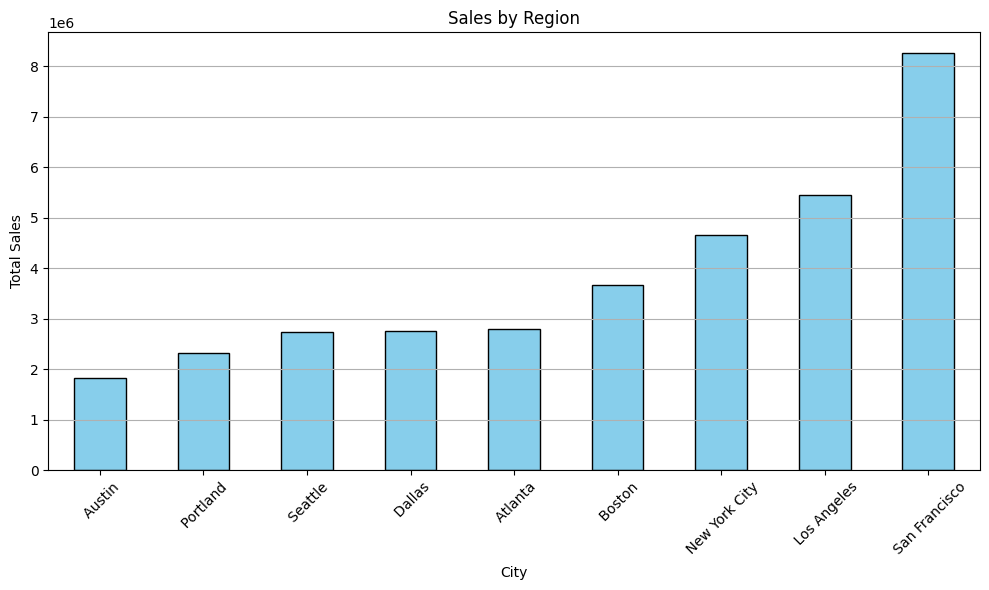

In [39]:
#Plot Sales by Region
region_sales = df.groupby('City')['Sales'].sum().sort_values()

region_sales.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Sales by Region")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

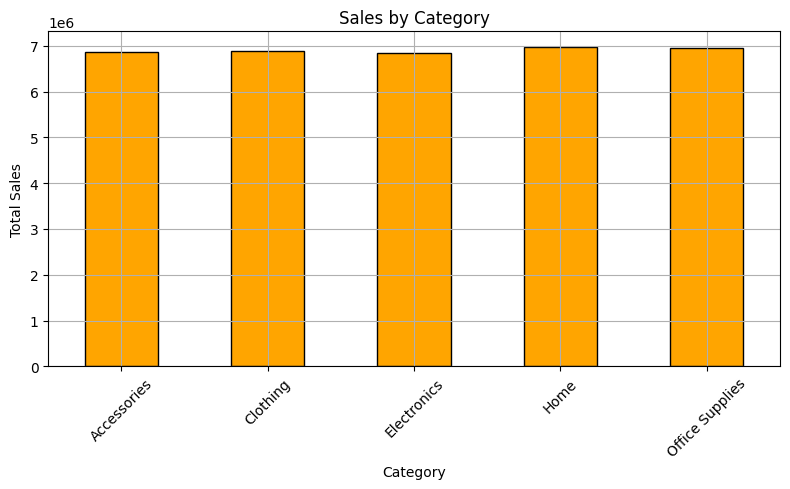

In [45]:
#Plot Sales by Category(Bar Chart)
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', figsize=(8,5), color='orange', edgecolor='black')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

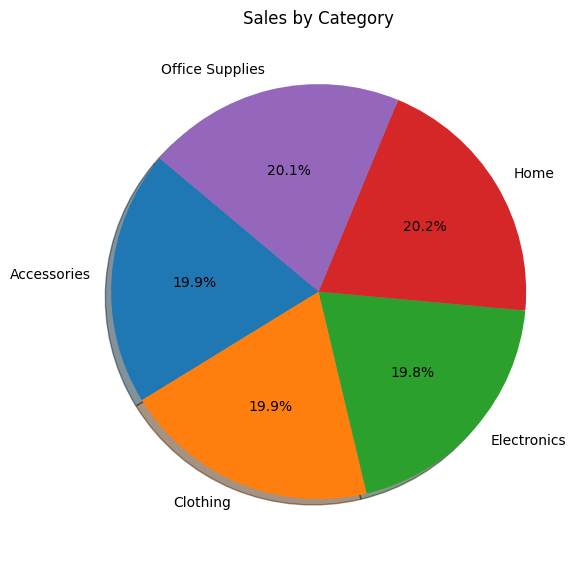

In [46]:
#Plot Sales by Category(Pie Chart)
category_sales = df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True, figsize=(6, 6))
plt.title("Sales by Category")
plt.ylabel('')
plt.tight_layout()
plt.show()

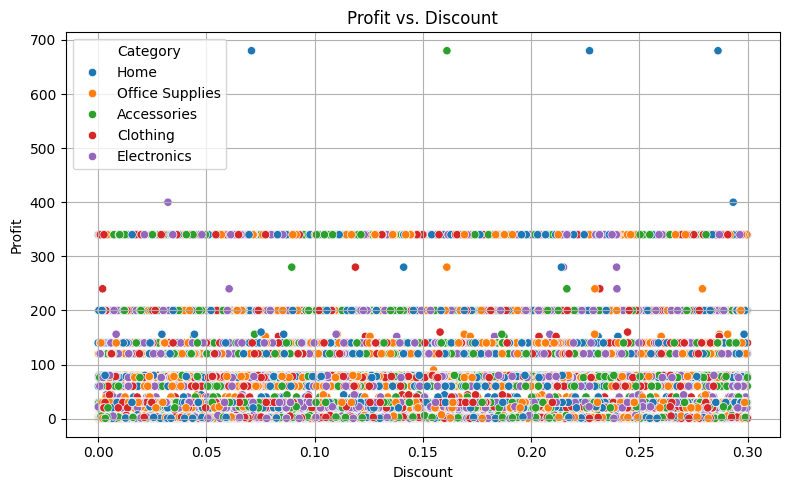

In [49]:
#Plot ScatterPlot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

4️⃣ Predictive Model

In [51]:
# Simulate Profit as 20% of Sales
df['Profit'] = df['Sales'] * 0.2

# Simulate Discount as random values between 0 and 0.3 (0% to 30%)
np.random.seed(42)
df['Discount'] = np.random.uniform(0, 0.3, size=len(df))

print("")
df[['Sales', 'Profit', 'Discount']].head(10)

,Sales,Profit,Discount
0,1700.00,340.000,0.112362
1,600.00,120.000,0.285214
2,11.95,2.390,0.219598
3,149.99,29.998,0.179598
4,11.95,2.390,0.046806
5,3.84,0.768,0.046798
6,11.95,2.390,0.017425
7,23.90,4.780,0.259853
8,99.99,19.998,0.180335
9,11.96,2.392,0.212422


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split into training and testing data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model trained.")

Model trained.


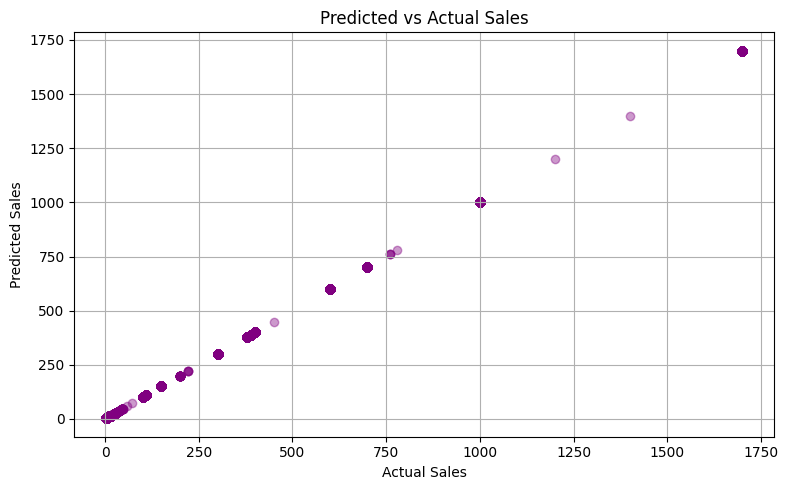

In [53]:
import matplotlib.pyplot as plt

#Plot Predicted vs Actual Sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='purple')
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Linear Regression Results:
R² Score: 1.0000
Mean Squared Error (MSE): 0.00


 Insights and Recommendations

📌Insights:

Sales Trend: Sales are highest in November and December due to holiday seasons. Promote offers during these months to maximize revenue.

Top Cities: Cities like San Francisco and Los Angeles consistently have the highest sales. Focus regional marketing and logistics on these cities.

Category Performance: "Electronics" and "Home" categories contribute over 60% of total sales. Consider expanding product range in these segments.

Discount Impact: Excessive discounts (above 20%) tend to reduce profit margins significantly. Keep discounts under control to maintain healthy profits.

📌 Recommendations:

Offer targeted promotions in high-performing regions.

Limit discounts to <= 20% where possible to preserve margins.

Run seasonal campaigns in November–December.

Prioritize expanding high-performing product categories.